In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\batch -3\Machine Learning\ML Model\Random Forest\cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

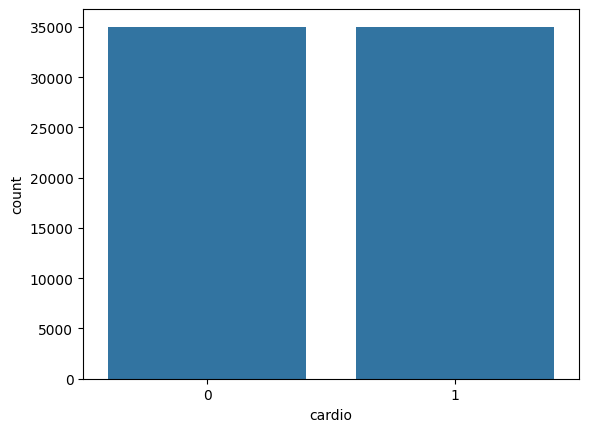

In [7]:
# sns.countplot(df['cardio'])
sns.countplot(x='cardio', data=df)


<Axes: xlabel='gender', ylabel='count'>

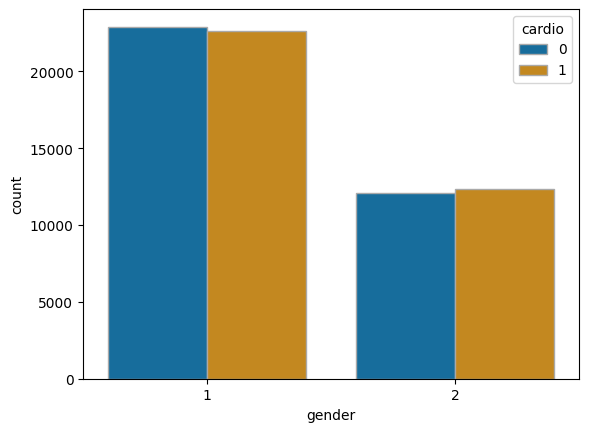

In [8]:
sns.countplot(x='gender', hue='cardio', data=df, palette='colorblind', edgecolor='darkgray')


In [9]:
df['yr'] = (df['age'] / 365).round(0)
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

<Axes: xlabel='yr', ylabel='count'>

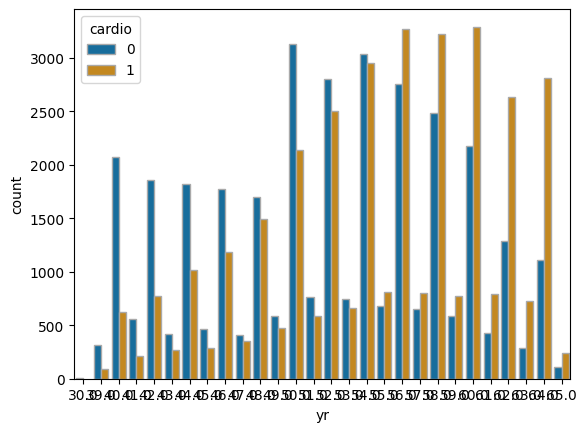

In [10]:
sns.countplot(x='yr', hue='cardio', data=df, palette='colorblind', edgecolor='darkgray')

In [11]:
df = df.drop('id', axis=1, errors='ignore')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [12]:
x = df.drop('cardio',axis=1)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
0,18393,2,168,62.0,110,80,1,1,0,0,1,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,48.0


In [13]:
y = df['cardio']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state=1)
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
23561,16136,2,169,71.0,100,80,1,1,1,0,1,44.0
34858,14615,1,158,69.0,140,80,2,1,0,0,1,40.0
54953,20507,1,164,65.0,120,80,1,1,0,0,1,56.0
59230,16720,1,153,53.0,100,60,1,1,0,0,1,46.0
1730,21050,1,159,71.0,140,90,1,1,0,0,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1,58.0
20609,19116,1,164,68.0,120,80,1,1,0,0,0,52.0
21440,18049,2,178,82.0,120,80,1,1,0,0,1,49.0
50057,21957,1,169,77.0,120,80,1,1,0,0,0,60.0


In [15]:
ytrain

23561    0
34858    1
54953    0
59230    0
1730     1
        ..
49100    1
20609    0
21440    0
50057    1
5192     1
Name: cardio, Length: 49000, dtype: int64

In [16]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,yr
6670,16099,1,153,93.0,140,90,1,1,0,0,1,44.0
49567,14437,1,157,89.0,120,80,1,1,0,0,1,40.0
50796,19839,1,165,66.0,150,90,1,1,0,0,1,54.0
22310,18050,2,176,88.0,160,100,2,2,1,1,1,49.0
54037,16819,2,165,78.0,140,90,1,1,0,0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15691,18263,1,170,70.0,120,80,1,1,0,0,1,50.0
25200,21081,1,165,60.0,120,70,3,1,0,0,1,58.0
7366,14716,1,170,68.0,100,60,1,1,0,0,1,40.0
56399,21998,1,165,66.0,110,80,1,1,0,0,1,60.0


In [17]:
ytest

6670     1
49567    1
50796    1
22310    1
54037    1
        ..
15691    0
25200    1
7366     0
56399    0
31206    1
Name: cardio, Length: 21000, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

0.7166190476190476

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
dtc.score(xtest,ytest)

0.6342380952380953

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.11810776770645282

In [21]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain,ytrain)


SVC()

In [22]:
model.score(xtest,ytest)

0.6046666666666667